In [1]:
# Load the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Information Gain (IG) & Entropy (H)

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

Entropy (H) attains its highest value when p = 0.5. This means that the probability of the event is $0.5$. Furthermore, Entropy's (H) minimum value is attained when $p = 0$ and $p = 1$, i.e., the probability of the event happening is totally predictable. Thus, the entropy shows the degree of predictability of an event.
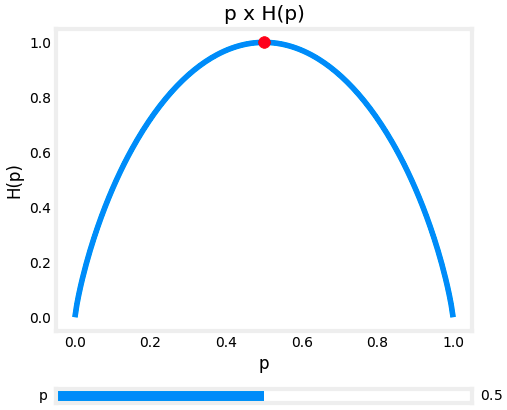

In [2]:
# Data Set

X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [3]:
print(f"X_train[0]:\n {X_train[0]}")
print(f"X_train.shape: {X_train.shape}")
print("\n")
print(f"y_train[0]:\n {y_train[0]}")
print(f"y_train.shape: {y_train.shape}")

X_train[0]:
 [1 1 1]
X_train.shape: (10, 3)


y_train[0]:
 1
y_train.shape: (10,)


$p_1^{node}$ = The fraction of examples that are label 1 in the root node.

$w^{left}$ = The fraction of examples, out of all the examples of the root node, that went to the left sub-branch.

$w^{right}$ = The fraction of examples, out of all the examples of the root node, that went to the right sub-branch.

In [4]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return (-p * np.log2(p)) - ((1-p) * np.log2(1-p))

print(entropy(0.5))

1.0


In [5]:
def split_indices(X, index_feature):
    """
    Given a dataset and an index feature, return two lists for the two splitted nodes.
    The left node has the animals that have that feature = 1 and the right node are those that have the feature = 0. 
    index feature = 0 => Ear Shape
    index feature = 1 => Face Shape
    index feature = 2 => Whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        #print("i:", i, "x:", x)
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

In [6]:
# If we choose Ear Shape to split, then we must have  in the left node (check above) the indices: 0 3 4 5 7.

split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

Now we need another function to compute the weighted entropy in the splitted nodes. As you've seen in the video lecture, we must find:

- $w^{\text{left}}$ and $w^{\text{right}}$, the proportion of animals in **each node**.
- $p^{\text{left}}$ and $p^{\text{right}}$, the proportion of cats in **each split**.

Note the difference between these two definitions!! To illustrate, if we split the root node on the feature of index 0 (Ear Shape), then in the left node, the one that has the animals 0, 3, 4, 5 and 7, we have:

$$w^{\text{left}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{left}} = \frac{4}{5}$$
$$w^{\text{right}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{right}} = \frac{1}{5}$$

In [7]:
def weighted_entropy(X, y, left_indices, right_indices):
    """
    This function takes the splitted Data Set, the indices we chose to split, and returns the Weighted Entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [8]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

0.7219280948873623

To compute the **Information Gain** we must subtract the Weighted Entropy from the Entropy in the node we chose to split (in this case, the root node). 

In [9]:
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes.
    """
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [10]:
information_gain(X_train, y_train, left_indices, right_indices)

0.2780719051126377

Now, let's compute the Information Gain if we split the root node for each feature:

In [11]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, Information Gain If We Split the Root Node Using this Feature: {i_gain:.2f}")

Feature: Ear Shape, Information Gain If We Split the Root Node Using this Feature: 0.28
Feature: Face Shape, Information Gain If We Split the Root Node Using this Feature: 0.03
Feature: Whiskers, Information Gain If We Split the Root Node Using this Feature: 0.12


So, the best feature to split is indeed the Ear Shape.

## Decision Trees (Mushrooms)

In [12]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

In [13]:
def compute_entropy(y):
    """
    Computes the entropy for a Node.
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           a Cat (`1`) or Not Cat (`0`).
       
    Returns:
        entropy (float): Entropy at that node   
    """
    entropy = 0
    
    p_1 = 0
    for i in range(len(y)):
        p_1 += y[i]
    
    # All Label 1 (Cat)
    if p_1 == len(y):
        return 0
    
    # All Label 0 (Not Cat)
    if p_1 == 0:
        return 0
    
    p_1 = p_1 / len(y)
    
    entropy = -p_1 * np.log2(p_1) - (1-p_1) * np.log2(1-p_1)
    
    return entropy

In [14]:
print("Entropy at Root Node: ", compute_entropy(y_train)) 

Entropy at Root Node:  1.0


In [15]:
# Entropy = 0
y_tmp = np.array([1, 1, 1, 1])
print(compute_entropy(y_tmp))

# Entropy = 0
y_tmp = np.array([0, 0, 0, 0])
print(compute_entropy(y_tmp))

# Entropy = 1
y_tmp = np.array([1, 0, 1, 0])
print(compute_entropy(y_tmp))

0
0
1.0


In [16]:
def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into left and right branches.
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on
    
    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """
    left_indices = []
    right_indices = []
    
    for index in node_indices:
        if X[index][feature] == 1:
            left_indices.append(index)
        else:
            right_indices.append(index)
        
    return left_indices, right_indices

In [17]:
# Case 1

root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# The Data Set has 3 Features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("CASE 1:")
print("Left Indices: ", left_indices)
print("Right Indices: ", right_indices)

print()

# Case 2

root_indices_subset = [0, 2, 4, 6, 8]
left_indices, right_indices = split_dataset(X_train, root_indices_subset, feature)

print("CASE 2:")
print("Left Indices: ", left_indices)
print("Right Indices: ", right_indices)

CASE 1:
Left Indices:  [0, 1, 2, 3, 4, 7, 9]
Right Indices:  [5, 6, 8]

CASE 2:
Left Indices:  [0, 2, 4]
Right Indices:  [6, 8]


In [18]:
def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
   
    Returns:
        cost (float):        Cost computed
    """    
    # Split the Data Set
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    # Some Useful Variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
    information_gain = 0
    
    H_node = compute_entropy(y_node)
    H_left = compute_entropy(y_left)
    H_right = compute_entropy(y_right)
    
    # The fraction of examples, out of all the examples of the parent node, that went to the left sub-branch
    w_left = len(X_left) / len((X_node))
    # The fraction of examples, out of all the examples of the parent node, that went to the right sub-branch
    w_right = len(X_right) / len(X_node)
    
    return H_node - (w_left * H_left + w_right * H_right)
    
    return information_gain

In [19]:
info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
print("Information Gain from Splitting the Root on Brown Cap: ", info_gain0)

info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
print("Information Gain from Splitting the Root on Tapering Stalk Shape: ", info_gain1)

info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)
print("Information Gain from Splitting the Root on Solitary: ", info_gain2)

Information Gain from Splitting the Root on Brown Cap:  0.034851554559677034
Information Gain from Splitting the Root on Tapering Stalk Shape:  0.12451124978365313
Information Gain from Splitting the Root on Solitary:  0.2780719051126377


In [20]:
def get_best_split(X, y, node_indices):   
    """
    Returns the optimal feature and threshold value to split the node data. 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """    
    num_features = X.shape[1]
    
    best_feature = -1
    information_gain = 0
    for i in range(num_features):
        
        information_gain_current = compute_information_gain(X, y, node_indices, i)
        
        if information_gain_current > information_gain:
            information_gain = information_gain_current
            best_feature = i
   
    return best_feature

In [21]:
best_feature = get_best_split(X_train, y_train, root_indices)
print("Best Feature to Split on: %d" % best_feature)

Best Feature to Split on: 2


In [22]:
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
    """ 
    # Maximum Depth Reached - Stop Splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s Leaf Node with Indices" % branch_name, node_indices)
        return
   
    # Otherwise, Get Best Split and Split the Data
    # Get the Best Feature and Threshold at this Node
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on Feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    # Split the Data Set at the Best Feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # Continue Splitting the Left and the Right Child. Increment Current Depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

In [23]:
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)

 Depth 0, Root: Split on Feature: 2
- Depth 1, Left: Split on Feature: 0
  -- Left Leaf Node with Indices [0, 1, 4, 7]
  -- Right Leaf Node with Indices [5]
- Depth 1, Right: Split on Feature: 1
  -- Left Leaf Node with Indices [8]
  -- Right Leaf Node with Indices [2, 3, 6, 9]
